# Electronic Supplementary Material: Network Analysis of Energy Futures
## Article Title: 'Harmominizing' energy futures - A network analysis approach
## Journal: Society and Natural Resources
### Authors: Jude H. Kurniawan (University of Waterloo), Vanessa Schweizer (University of Waterloo)

In [1]:
import csv
import networkx as nx
import pandas as pd
import community
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
from seaborn import color_palette, set_style, palplot

In [2]:
#Check version
import pkg_resources
print('Networkx Version: ',pkg_resources.get_distribution('networkx').version)
print('Pandas Version: ',pkg_resources.get_distribution('pandas').version)
print('Matplotlib Version: ',pkg_resources.get_distribution('matplotlib').version)

Networkx Version:  2.1
Pandas Version:  0.23.0
Matplotlib Version:  2.2.2


### Getting the data (edge list)

In [3]:
se = pd.read_csv('./data/ES_edgelist.csv', sep=',')
se.head()

,node1,node2,report_name
0,Oil consumption,GHG Emissions (aggregate),Trottier
1,LNG consumption,GHG Emissions (aggregate),Trottier
2,Electricity consumption,GHG Emissions (aggregate),Trottier
3,Biofuels consumption,Oil consumption,Trottier
4,Oil consumption,GHG Emissions (aggregate),Trottier


In [4]:
# Seperating edgelist into different dataframes so that nodes/edges can be manipulated individually
se4 = se.iloc[:192]
se_trot = se.iloc[:30]
se_deep = se.iloc[30:72]
se_neb = se.iloc[72:92]
se_rnrg = se.iloc[92:192]
se_wec = se.iloc[192:]

In [5]:
GSE5 = nx.from_pandas_edgelist(se,'node1','node2',edge_attr=None) # edge_attr not needed
GSE4 = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=None)
GSE_wec = nx.from_pandas_edgelist(se_wec,'node1','node2',edge_attr=None) # Individual network for WEC global scenarios
GSE_trot = nx.from_pandas_edgelist(se_trot,'node1','node2',edge_attr=None) # Individual network for TEFP
GSE_deep = nx.from_pandas_edgelist(se_deep,'node1','node2',edge_attr=None) # Individual network for DDPC
GSE_neb = nx.from_pandas_edgelist(se_neb,'node1','node2',edge_attr=None) # Individual network for NEB
GSE_rnrg = nx.from_pandas_edgelist(se_rnrg,'node1','node2',edge_attr=None) # Individual network for Re-energizing Canada

In [6]:
print ('Multi-study network comprises of four Canadian and one global studies\n',nx.info(GSE5))
print ('Multi-study network comprises of four Canadian studies\n',nx.info(GSE4))
print ('Network for Trottier Energy Futures Project (TEFP)\n',nx.info(GSE_trot))
print ('Network for Deep Decarnonization Pathways for Canada\n',nx.info(GSE_deep))
print ('Network for National Energy Board 2016 report\m',nx.info(GSE_neb))
print ('Network for the Re-energizing Canada/n',nx.info(GSE_rnrg))
print ('Network for World Energy Council\n',nx.info(GSE_wec))

Multi-study network comprises of four Canadian and one global studies
 Name: 
Type: Graph
Number of nodes: 177
Number of edges: 245
Average degree:   2.7684
Multi-study network comprises of four Canadian studies
 Name: 
Type: Graph
Number of nodes: 134
Number of edges: 181
Average degree:   2.7015
Network for Trottier Energy Futures Project (TEFP)
 Name: 
Type: Graph
Number of nodes: 27
Number of edges: 28
Average degree:   2.0741
Network for Deep Decarnonization Pathways for Canada
 Name: 
Type: Graph
Number of nodes: 41
Number of edges: 39
Average degree:   1.9024
Network for National Energy Board 2016 report\m Name: 
Type: Graph
Number of nodes: 18
Number of edges: 19
Average degree:   2.1111
Network for the Re-energizing Canada/n Name: 
Type: Graph
Number of nodes: 95
Number of edges: 99
Average degree:   2.0842
Network for World Energy Council
 Name: 
Type: Graph
Number of nodes: 51
Number of edges: 64
Average degree:   2.5098


## Visualizing Multi-study Network

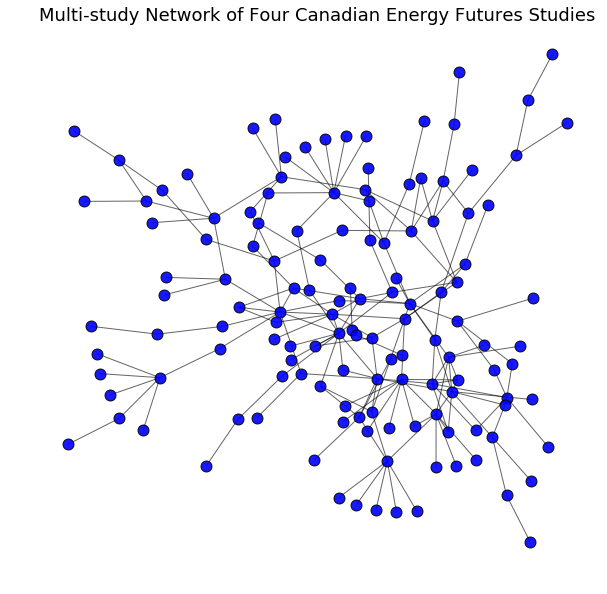

In [7]:
layout = nx.kamada_kawai_layout(GSE5)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Multi-study Network of Four Canadian Energy Futures Studies',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120, alpha=.9, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=1, alpha=.6)

plt.show()

## Visualizing Different Perspectives of Individual Study

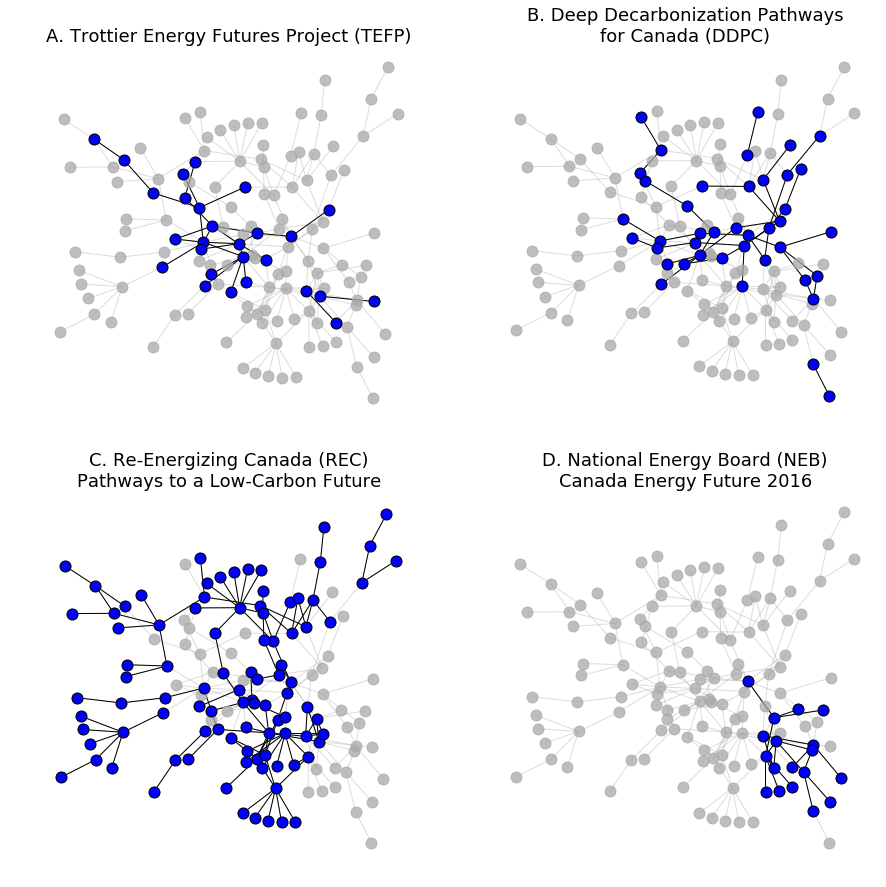

In [8]:
#customization lines for different studies
studytext1 = 'A. Trottier Energy Futures Project (TEFP)'
studytext2 = 'B. Deep Decarbonization Pathways\nfor Canada (DDPC)'
studytext3 = 'C. Re-Energizing Canada (REC)\nPathways to a Low-Carbon Future'
studytext4 = 'D. National Energy Board (NEB)\nCanada Energy Future 2016'

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.axis('off')
plt.title(studytext1,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_trot, layout, edge_color='k',width=1)

plt.subplot(222)
plt.axis('off')
plt.title(studytext2,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_deep, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_deep, layout, edge_color='k',width=1)

plt.subplot(223)
plt.axis('off')
plt.title(studytext3,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_rnrg, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_rnrg, layout, edge_color='k',width=1)

plt.subplot(224)
plt.axis('off')
plt.title(studytext4,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_neb, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_neb, layout, edge_color='k',width=1)

plt.savefig('./figures/SNR-ESM-Fig1.png', bbox_inches = 'tight')
plt.show()

In [9]:
print('The scenario elements or nodes in NEB report are: \n', GSE_neb.nodes())
print('\nThe scenario elements or nodes in Deep Decarbonizations report are: \n', GSE_deep.nodes())

The scenario elements or nodes in NEB report are: 
 ['Oil demand (global)', 'Oil prices (global)', 'LNG production (USA)', 'Oil sand production', 'LNG demand (USA/Canada)', 'LNG prices (global)', 'Population', 'GDP', 'USA Economy', 'Rise of China and Asia', 'Export', 'LNG infrastructures development', 'LNG production', 'Energy intensity', 'Developing countries GDP', 'Oil infrastructures development', 'LNG demand (USA)', 'LNG demand']

The scenario elements or nodes in Deep Decarbonizations report are: 
 ['Fuel switching', 'GHG Emissions (aggregate)', 'Renewable energy generation', 'Wind power production cost', 'Wind power generation', 'Solar power production cost', 'Solar power generation', 'Innovation capacity (global)', 'Banning coal/oil-fired generation', 'Carbon intensity', 'Gas-fired generation', 'LNG demand', 'New clean tech generation', 'Electricity generation', 'Electrification policy', 'Tech dev in renewable energy', 'GHG Emissions (building)', 'Adoption of EV', 'GHG Emissions

In [10]:
# Examine which nodes in NEB are not present in other studies
lsNeb = list(GSE_neb.nodes())
lsDeep = list(GSE_deep.nodes())
lsTrot = list(GSE_trot.nodes())
lsRnrg = list(GSE_rnrg.nodes())
lsNotCommon = list(set(lsNeb) - set(lsDeep + lsTrot + lsRnrg))
lsNotCommon

['Rise of China and Asia',
 'LNG demand (USA/Canada)',
 'Oil infrastructures development',
 'LNG infrastructures development',
 'USA Economy',
 'LNG prices (global)',
 'Population',
 'LNG demand (USA)',
 'Developing countries GDP',
 'LNG production (USA)']

In [11]:
# Examine which nodes in TEFP are not present in other studies
lsNotCommon = list(set(lsTrot) - set(lsDeep + lsNeb + lsRnrg))
lsNotCommon

['Electricity consumption',
 'LNG demand (global)',
 'Hydro electric generation',
 'GHG Emissions (electricity)',
 'Biofuels consumption (Freight)',
 'Electricity consumption (residential)']

In [12]:
# Examine which nodes in DDPC are not present in other studies
lsNotCommon = list(set(lsDeep) - set(lsTrot + lsNeb + lsRnrg))
lsNotCommon

['Building retrofit incentives',
 'GHG Emissions (agriculture)',
 'Innovation capacity (global)',
 'Energy tech change (building)',
 'Solar power generation',
 'GHG Emissions (oil and gas)',
 'Gas-fired generation',
 'Fuel switching',
 'Electrification policy',
 'Banning coal/oil-fired generation',
 'Blending target policy mandate',
 'Energy efficiency policy mandate',
 'Transport modal shift',
 'Energy intensity (transport)',
 'Energy tech change (transport)']

In [13]:
def noteLabelSlim(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.03, width=0.1,headwidth=3.5),
        xytext=xy_text, fontsize=myfontsize)
    return

def noteLabel(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.02, width=0.5),
        xytext=xy_text, fontsize=myfontsize)
    return

## Visualizing Canada/Global Cross-scale Interactions

In [14]:
ls1 = list(GSE4.nodes())
ls2 = list(GSE_wec.nodes())
ls3 = set(ls1).intersection(ls2)
GSE_xscale = nx.Graph()
for n in ls3:
    GSE_xscale.add_node(n)

GSE_xscale.node() #Display all the cross-scale nodes

NodeView(('Rise of China and Asia', 'LNG demand (global)', 'Innovation capacity (global)', 'GHG reduction target', 'LNG prices (global)', 'Developing countries GDP', 'Oil prices (global)', 'Oil demand (global)'))

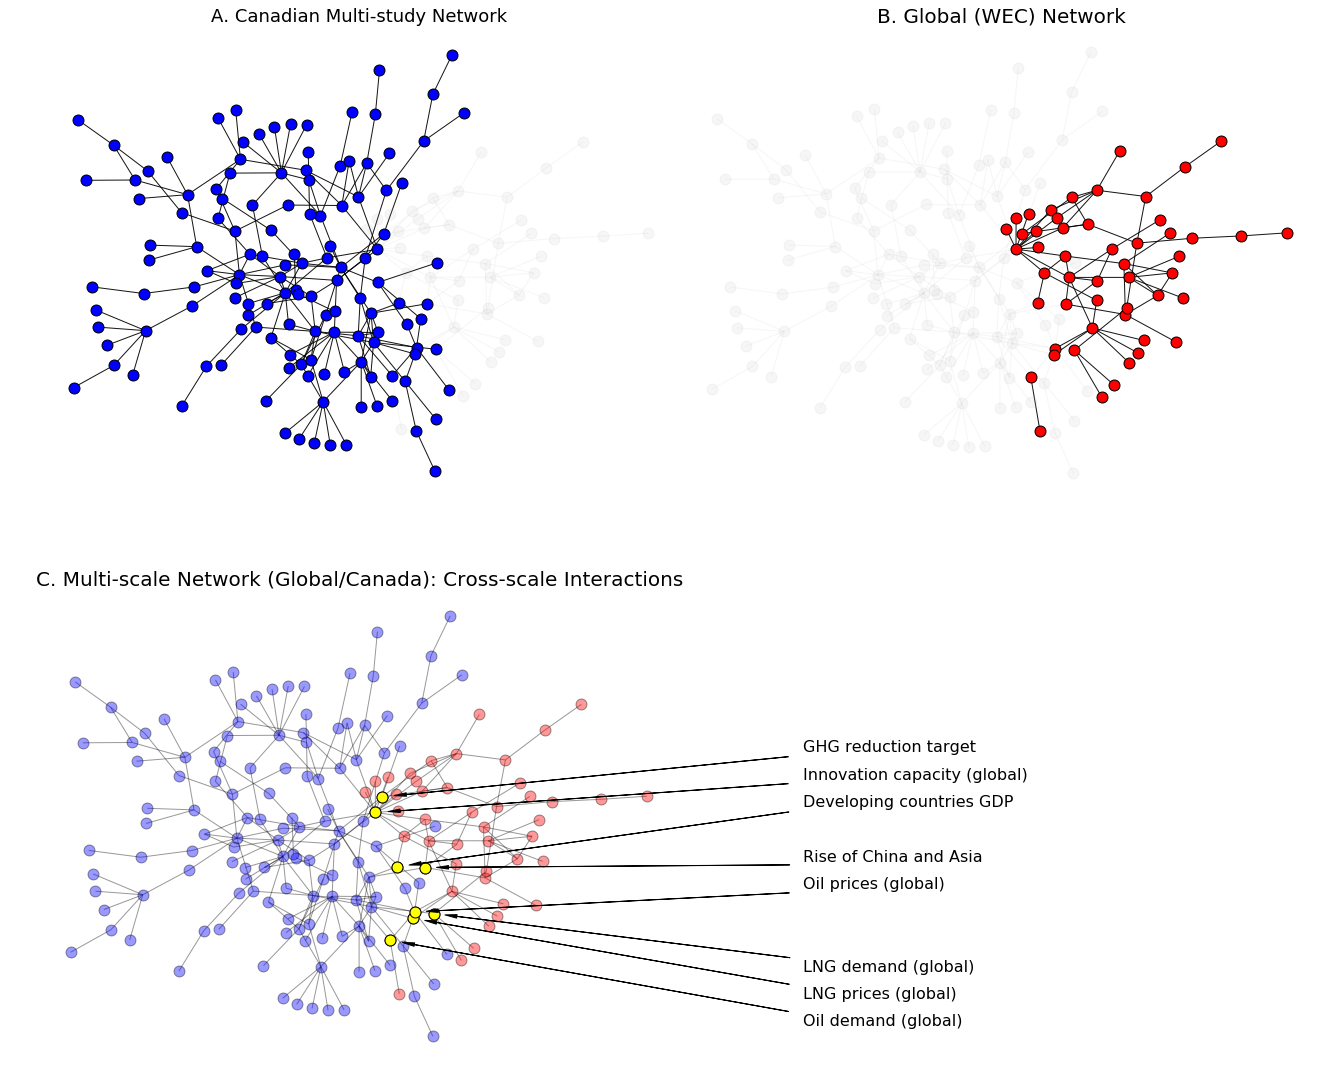

In [15]:
plt.figure(figsize=(23,19))
plt.axis('off')

plt.subplot(221)
plt.axis('off')
plt.title('A. Canadian Multi-study Network',fontsize=18)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=120, alpha = .1)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=1, alpha = .1)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=1, alpha = .9)

plt.subplot(222)
plt.axis('off')
plt.title('B. Global (WEC) Network',fontsize=20)
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgrey', node_size=120, alpha=.1)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgrey',width=1, alpha = .1)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='r', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_wec, layout, edge_color='k',width=1, alpha = 0.9)

plt.subplot(223)
plt.axis('off')
plt.title('C. Multi-scale Network (Global/Canada): Cross-scale Interactions',fontsize=20)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120, edgecolors='k', alpha = .4)
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=1, alpha = .4)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='r', node_size=120, edgecolors='k', alpha = .4)
nx.draw_networkx_edges(GSE_wec, layout, edge_color='k',width=1, alpha = .4)
nx.draw_networkx_nodes(GSE_xscale, layout, node_color='yellow', edgecolors='k',node_size=120)

my_fontsize = 16
noteLabelSlim('GHG reduction target', (1.5,0.3), my_fontsize)
noteLabelSlim('Innovation capacity (global)', (1.5,0.2), my_fontsize)
noteLabelSlim('Developing countries GDP', (1.5,0.1), my_fontsize)
noteLabelSlim('Rise of China and Asia', (1.5,-0.1), my_fontsize)
noteLabelSlim('Oil prices (global)', (1.5,-0.2), my_fontsize)
noteLabelSlim('LNG demand (global)', (1.5,-0.5), my_fontsize)
noteLabelSlim('LNG prices (global)', (1.5,-0.6), my_fontsize)
noteLabelSlim('Oil demand (global)', (1.5,-0.7), my_fontsize)

plt.subplots_adjust(wspace=0.0)
plt.savefig('./figures/SNR-ESM-Fig2.png', bbox_inches = 'tight')
plt.show()

In [16]:
# Examine how cross-scale nodes are connected to other Canadian nodes
for n in GSE_xscale.node():
    print (n,'is connected to', list(GSE4.neighbors(n)))

Rise of China and Asia is connected to ['Export']
LNG demand (global) is connected to ['LNG production']
Innovation capacity (global) is connected to ['Wind power production cost', 'Solar power production cost', 'Tech dev in green transport', 'Tech dev in energy storage']
GHG reduction target is connected to ['Energy intensity', 'GHG Emissions (oil and gas)', 'GHG Emissions (agriculture)']
LNG prices (global) is connected to ['LNG demand (USA/Canada)', 'LNG production']
Developing countries GDP is connected to ['Export']
Oil prices (global) is connected to ['Energy tech change (transport)', 'Energy tech change (building)', 'Oil demand (global)', 'LNG production (USA)', 'Oil sand production']
Oil demand (global) is connected to ['Oil sand production', 'Oil prices (global)']


In [17]:
# Examine how cross-scale nodes are connected to other global nodes
for n in GSE_xscale.node():
    print (n,'is connected to', list(GSE_wec.neighbors(n)))

Rise of China and Asia is connected to ['GDP (global)', 'Tech investment (global)', 'Growing middle class (global)']
LNG demand (global) is connected to ['Gasification of heavy freight transport (global)', 'Gasification of marine feeder transport (global)', 'Fuel switching (global)']
Innovation capacity (global) is connected to ['Tech dev in green transport (global)', 'Tech dev in low carbon system (global)', 'Tech dev in energy storage (global)', 'Tech dev in renewable energy (global)', 'Tech dev in machine learning (global)', 'Tech dev in data analytics (global)', 'Tech dev in articifical intelligence (global)', 'Tech dev in ICT (global)', 'Tech dev in energy efficiency (global)', 'Economic productivity (global)', 'GDP (global)']
GHG reduction target is connected to ['Carbon intensity (global)', 'Global environmental institution']
LNG prices (global) is connected to ['Geopolitical tensions']
Developing countries GDP is connected to ['Tech dev in ICT (global)']
Oil prices (global) is 

In [18]:
def lst_to_area(grp, pos): # grp is the group of the communities, pos is the networkx layout
    grp_area = []
    for n in grp:
        grp_area.append(pos[n])
    return grp_area

def labelanywhere(string_text,xy_loc,xy_text,myfontsize): # for printing text label annotations (arrow)
    plt.annotate(string_text,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.02, width=0.5),
        xytext=xy_text, fontsize=myfontsize)
    return

## Visualizing Significant Nodes - Eigenvector & Betweenness Centralities

In [19]:
partition_ca = community.best_partition(GSE4, randomize=False)

In [20]:
# Calculate eigenvector and betweenness centraliites for Canada Multi-study Network
eig = nx.eigenvector_centrality(GSE4)
bet = nx.betweenness_centrality(GSE4)

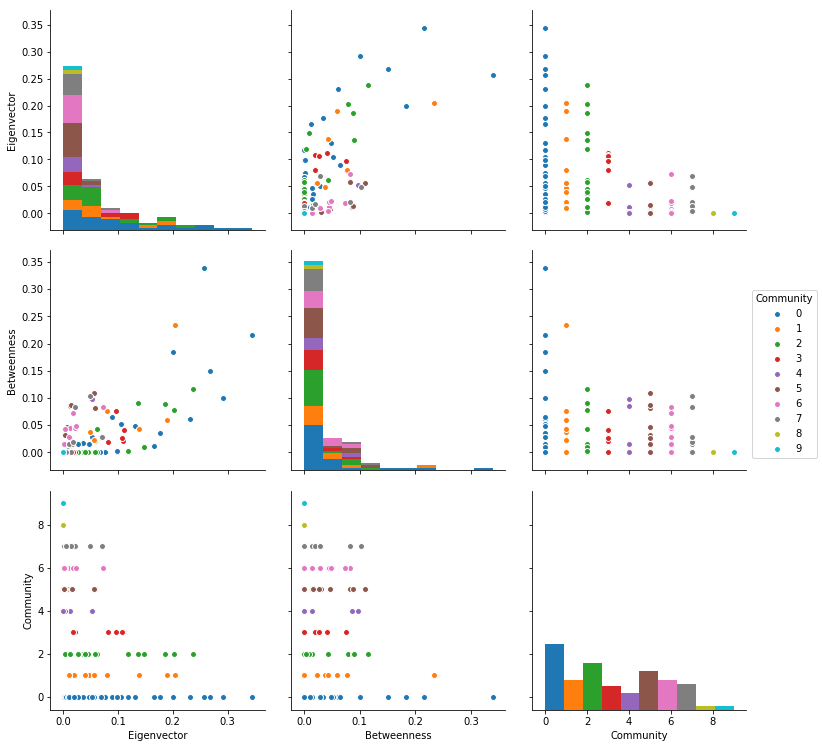

In [21]:
cent_df = pd.DataFrame.from_dict([eig, bet, partition_ca])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Eigenvector', 'Betweenness', 'Community']
cent_df['Community'] = cent_df['Community'].astype(int)
sns.pairplot(cent_df, hue = 'Community', size=3.5)

In [22]:
x = cent_df['Eigenvector']
y = cent_df['Betweenness']

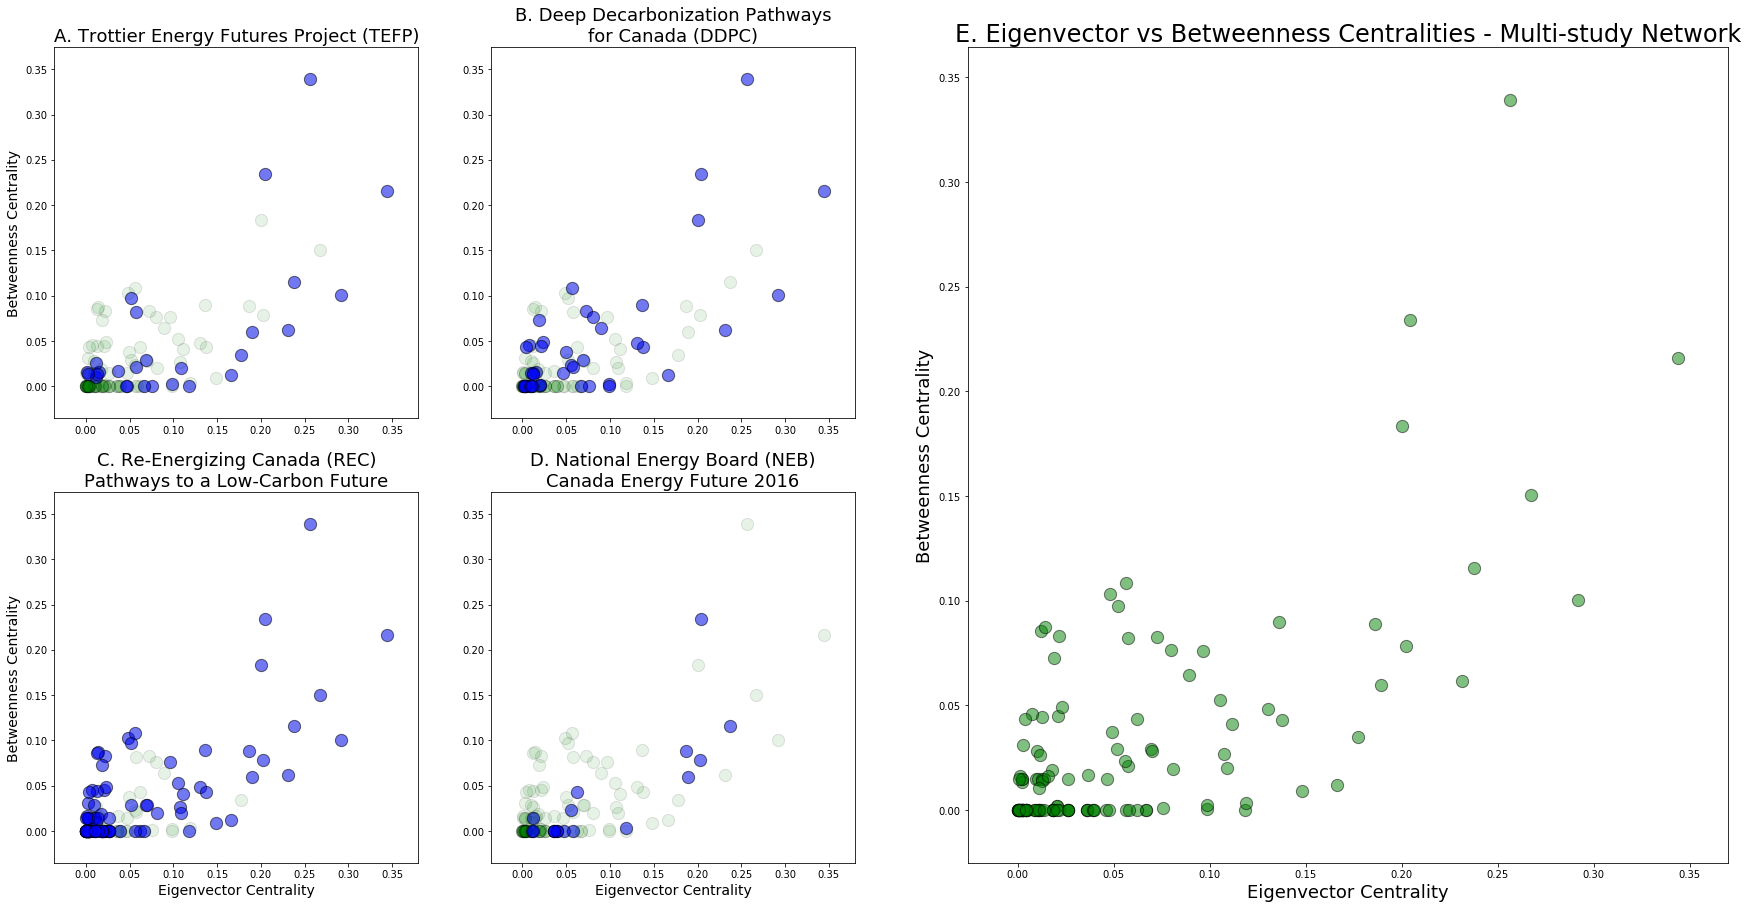

In [23]:
nodesColor = 'b'
bgnodesColor = 'green'
plt.figure(figsize=(30,15))
plt.axis('off')

plt.subplot(122)
plt.title('E. Eigenvector vs Betweenness Centralities - Multi-study Network',fontsize=24)
plt.scatter(x, y, s=150, c='green', edgecolors= 'k', alpha=0.5)
plt.ylabel('Betweenness Centrality', fontsize= 18)
plt.xlabel('Eigenvector Centrality', fontsize= 18)

plt.subplot(241)
plt.title(studytext1,fontsize=18)
x1 = pd.Series({x: eig[x] for x in GSE_trot.node()})
y1 = pd.Series({x: bet[x] for x in GSE_trot.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x1, y1, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)
plt.ylabel('Betweenness Centrality', fontsize= 14)

plt.subplot(242)
plt.title(studytext2,fontsize=18)
x2 = pd.Series({x: eig[x] for x in GSE_deep.node()})
y2 = pd.Series({x: bet[x] for x in GSE_deep.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x2, y2, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)

plt.subplot(245)
plt.title(studytext3,fontsize=18)
x3 = pd.Series({x: eig[x] for x in GSE_rnrg.node()})
y3 = pd.Series({x: bet[x] for x in GSE_rnrg.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x3, y3, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)
plt.ylabel('Betweenness Centrality', fontsize= 14)
plt.xlabel('Eigenvector Centrality', fontsize= 14)

plt.subplot(246)
plt.title(studytext4,fontsize=18)
x4 = pd.Series({x: eig[x] for x in GSE_neb.node()})
y4 = pd.Series({x: bet[x] for x in GSE_neb.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x4, y4, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)
plt.xlabel('Eigenvector Centrality', fontsize= 14)

plt.savefig('./figures/SNR-ESM-Fig3.png', bbox_inches = 'tight')
plt.show()

In [24]:
eig_size = [50+1500*eig[n] for n in GSE4.nodes()]
bet_size = [50+1500*bet[n] for n in GSE4.nodes()]

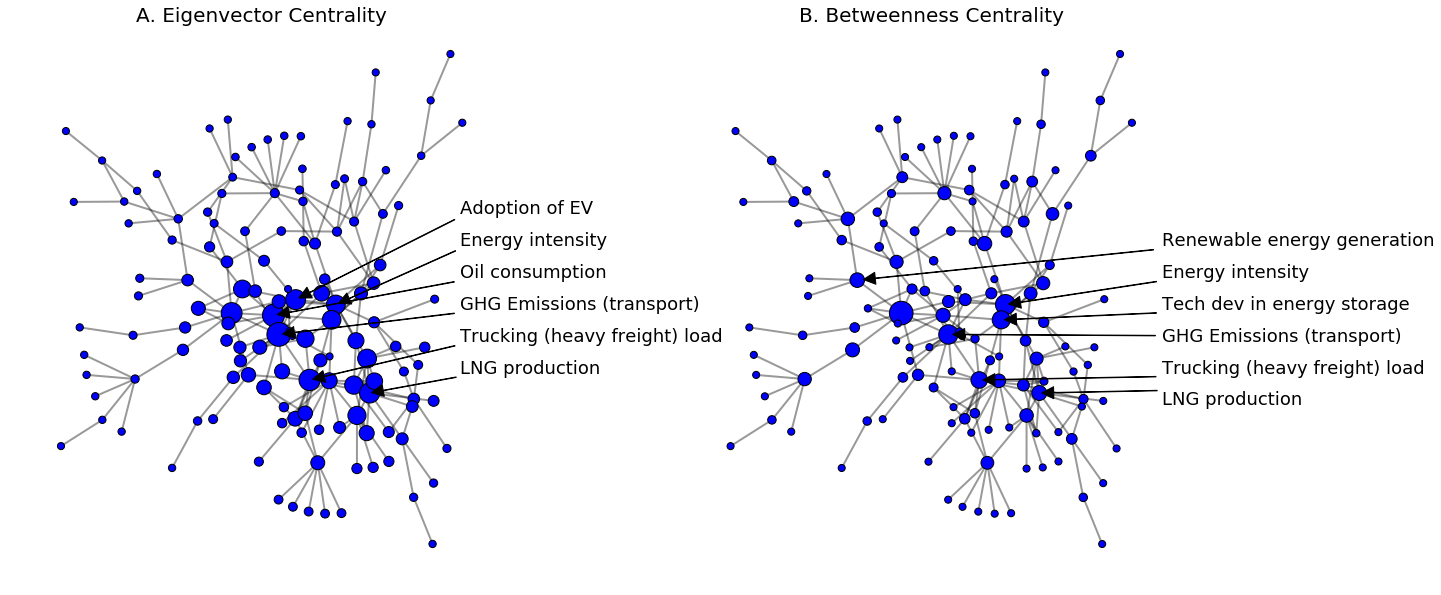

In [25]:
my_fontsize = 18
plt.figure(figsize=(20,10))
plt.axis('off')

plt.subplot(121)
plt.axis('off')
plt.title('A. Eigenvector Centrality',fontsize=20)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=eig_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=2, alpha= .4)

noteLabel('Adoption of EV', (0.4,0.3), my_fontsize)
noteLabel('Energy intensity', (0.4,0.2), my_fontsize)
noteLabel('Oil consumption', (0.4,0.1), my_fontsize)
noteLabel('GHG Emissions (transport)', (0.4,0), my_fontsize)
noteLabel('Trucking (heavy freight) load', (0.4,-0.1), my_fontsize)
noteLabel('LNG production', (0.4,-0.2), my_fontsize)

plt.subplot(122)
plt.axis('off')
plt.title('B. Betweenness Centrality',fontsize=20)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=bet_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=2, alpha=0.4)

noteLabel('Renewable energy generation', (0.5,0.2), my_fontsize)
noteLabel('Energy intensity', (0.5,0.1), my_fontsize)
noteLabel('Tech dev in energy storage', (0.5,0.0), my_fontsize)
noteLabel('GHG Emissions (transport)', (0.5,-0.1), my_fontsize)
noteLabel('Trucking (heavy freight) load', (0.5,-0.2), my_fontsize)
noteLabel('LNG production', (0.5,-0.3), my_fontsize)

plt.subplots_adjust(wspace=0.5)
plt.savefig('./figures/SNR-ESM-Fig4.png', bbox_inches = 'tight')
plt.show()

In [26]:
t1 = 'Trucking (heavy freight) load'
t2 = 'Oil consumption'
print (list(GSE4.neighbors(t1)), list(GSE4.neighbors(t2)))

['Agricultural production', 'Forest production', 'Oil sand production', 'LNG production', 'Freight (trade) volume', 'Biogas production', 'Biofuels production', 'GHG Emissions (transport)'] ['GHG Emissions (aggregate)', 'Biofuels consumption', 'Biofuels production', 'GHG Emissions (transport)', 'Electricity consumption', 'Adoption of EV', 'Tech dev in energy storage', 'Health issues for indigenous communities']


In [27]:
cent_df.sort_values('Eigenvector',ascending=False).head(25)

,Eigenvector,Betweenness,Community
GHG Emissions (transport),0.344127,0.216002,0
Oil consumption,0.291998,0.100315,0
Trucking (heavy freight) load,0.267228,0.150394,0
GHG Emissions (aggregate),0.256534,0.339049,0
LNG production,0.237551,0.115559,2
Adoption of EV,0.231423,0.061744,0
Energy intensity,0.204339,0.233946,1
Export,0.202214,0.078317,2
Tech dev in energy storage,0.199930,0.183621,0
Oil sand production,0.189331,0.059576,1


In [28]:
cent_df.sort_values('Betweenness',ascending=False).head(25)

,Eigenvector,Betweenness,Community
GHG Emissions (aggregate),0.256534,0.339049,0
Energy intensity,0.204339,0.233946,1
GHG Emissions (transport),0.344127,0.216002,0
Tech dev in energy storage,0.199930,0.183621,0
Trucking (heavy freight) load,0.267228,0.150394,0
LNG production,0.237551,0.115559,2
Renewable energy generation,0.056670,0.108577,5
Active mobility,0.048277,0.102942,7
Oil consumption,0.291998,0.100315,0
Sectoral coordination,0.052094,0.097289,4


## Visualizing Modular Structure of Canadian Multi-study Network - Community Detection

In [29]:
colors = [partition_ca[n] for n in GSE4.nodes()]
my_colors = plt.cm.Set3
my_fontsize = 14

# Manually adjust layout position for all groups
layout2 = nx.spring_layout(GSE4, random_state=8)

checklist = [n for n in partition_ca if partition_ca[n]==0]
for n in checklist:
    layout2[n] = layout2[n] + ([-0.0,-0.20])

checklist = [n for n in partition_ca if partition_ca[n]==1]
for n in checklist:
    layout2[n] = layout2[n] + ([-0.2,0.3])

checklist = [n for n in partition_ca if partition_ca[n]==2]
for n in checklist:
    layout2[n] = layout2[n] + ([-0.50,0.2])

checklist = [n for n in partition_ca if partition_ca[n]==3]
for n in checklist:
    layout2[n] = layout2[n] + ([0.0,-0.5])

checklist = [n for n in partition_ca if partition_ca[n]==4]
for n in checklist:
    layout2[n] = layout2[n] + ([0.23,-0.1])
    
checklist = [n for n in partition_ca if partition_ca[n]==5]
for n in checklist:
    layout2[n] = layout2[n] + ([0.0,0.33])

checklist = [n for n in partition_ca if partition_ca[n]==6]
for n in checklist:
    layout2[n] = layout2[n] + ([0.2,-0.2])

checklist = [n for n in partition_ca if partition_ca[n]==7]
for n in checklist:
    layout2[n] = layout2[n] + ([-0.3,-0.22])
    
checklist = [n for n in partition_ca if partition_ca[n]==8]
for n in checklist:
    layout2[n] = layout2[n] + ([0.419,0.0])

checklist = [n for n in partition_ca if partition_ca[n]==9]
for n in checklist:
    layout2[n] = layout2[n] + ([-0.315,0.309])


In [30]:
# Create polygon patches for each groups
grp0_lst = ['Trucking (heavy freight) load','Electricity consumption (residential)',
            'Use of electrical appliances','Tech dev in green transport',
            'Regulatory standard for green transport','Emerging green transport businesses',
            'Regulatory standard for green transport','Oil consumption',
            'Biofuels consumption','LNG consumption','Management of natural resources',
            'Indigenous knowledge','Energy studies scholarship','Management of natural resources',
            'GHG Emissions (aggregate)','Transport modal shift','Energy intensity (transport)',
            'Waste to energy tech dev','Biogas production','Biofuels consumption (Freight)',
            'Electrification of light freight transport','Intercity (people) mobility',
            'Rail infrastructure','Electrification of rail transport','Freight (trade) volume',
            'Health issues for indigenous communities','Blending target policy mandate',
            'Tech dev in green transport']
grp0_area = lst_to_area(grp0_lst, layout2)
grp0 = Polygon(grp0_area,closed=True, fill=False,ec='c',joinstyle='round',lw=40,alpha=0.4)

grp1_lst = ['Building retrofit incentives','Energy efficiency policy mandate',
            'GHG Emissions (agriculture)','Tech dev in artifical intelligence',
            'GHG Emissions (oil and gas)','Tech dev in low carbon system','Energy intensity',
            'GHG reduction target','Oil demand (global)','Oil prices (global)',
            'LNG production (USA)','Energy tech change (building)','Energy tech change (transport)']
grp1_area = lst_to_area(grp1_lst, layout2)
grp1 = Polygon(grp1_area,closed=True, fill=False,ec='yellow',joinstyle='round',lw=40,alpha=0.4)

grp2_lst = ['LNG demand (global)','Developing countries GDP','Rise of China and Asia',
            'R&D funding from government','Tech dev in energy efficiency','Educational attainment',
            'Economic productivity','LNG infrastructures development','Population',
            'Oil infrastructures development','GDP','Innovation capacity','USA Economy',
            'LNG production','LNG prices (global)','LNG demand','Gas-fired generation',
            'LNG demand (USA)','LNG demand (USA/Canada)']
grp2_area = lst_to_area(grp2_lst, layout2)
grp2 = Polygon(grp2_area,closed=True, fill=False,ec='mediumpurple',joinstyle='round',lw=40,alpha=0.4)

grp3_lst = ['Feedstock (biofuel) supply','Biorefinery strategy',
            'Forest production','Food prices','Transition to decarbonized economy',
            'Fishery production','Biotech production','High-tech manufacturing production',
            'Sustainable social change','Transition to decarbonized economy','Food prices']
grp3_area = lst_to_area(grp3_lst, layout2)
grp3 = Polygon(grp3_area,closed=True, fill=False,ec='royalblue',joinstyle='round',lw=40,alpha=0.4)

grp4_lst = ['Tech dev in green transport (rail)','Gov budget for energy transition',
            'Multilevel governance','Low carbon energy governance','Sectoral coordination',
            'Institutions framework']
grp4_area = lst_to_area(grp4_lst, layout2)
grp4 = Polygon(grp4_area,closed=True, fill=False,ec='orange',joinstyle='round',lw=40,alpha=0.4)

grp5_lst = ['Wind power generation','New clean tech generation','Geographic availability',
            'Electrification policy','Renewable energy generation',
            'Employment for indigenous communities','Participatory planning',
            'Participatory visioning','Environmental impacts','Road infrastructure',
            'Harmonize elect generation load profile','Inter-province HV infrastructure',
            'Inter-province electricity trade','Hydro electric generation','Environmental impacts',
            'Inter-province HV infrastructure','Social acceptance','Hydro electric generation',
            'New clean tech generation','GHG Emissions (electricity)','GHG Emissions (electricity)']
grp5_area = lst_to_area(grp5_lst, layout2)
grp5 = Polygon(grp5_area,closed=True, fill=False,ec='y',joinstyle='round',lw=40,alpha=0.4)

grp6_lst = ['Energy production cost','Large-scale hydropower construction','Solar power generation',
            'GHG Emissions (building)','District cooling/heating',
            'Wooden buildings','Carbon sink','Enterprenuership in private sector',
            'Tech investment','Tech dev in renewable energy','Solar power production cost',
            'Innovation capacity (global)']
grp6_area = lst_to_area(grp6_lst, layout2)
grp6 = Polygon(grp6_area,closed=True, fill=False,ec='grey',joinstyle='round',lw=40,alpha=0.4)

grp7_lst = ['Shared mobility','Active mobility','Carbon intensity',
            'Banning coal/oil-fired generation','Urban green infrastructure',
            'House size','Urbanization','Number of passenger per vehicle',
            'Road speed limit','Energy consumption','Distance travel']
grp7_area = lst_to_area(grp7_lst, layout2)
grp7 = Polygon(grp7_area,closed=True, fill=False,ec='purple',joinstyle='round',lw=40,alpha=0.4)

grp8_lst = ['Climate change','Loss of biodiversity']
grp8_area = lst_to_area(grp8_lst, layout2)
grp8_area.append(grp8_area[0]+[0.001,0.001])
grp8 = Polygon(grp8_area,closed=True,fill=False,ec='lightgreen',joinstyle='round',lw=40,alpha=0.4)

grp9_lst = ['Partnership with automotive industry','Tech dev in green transport (freight)']
grp9_area = lst_to_area(grp9_lst, layout2)
grp9_area.append(grp9_area[0]+[0.001,0.001])
grp9 = Polygon(grp9_area,closed=True,fill=False,ec='gold',joinstyle='round',lw=40,alpha=0.4)

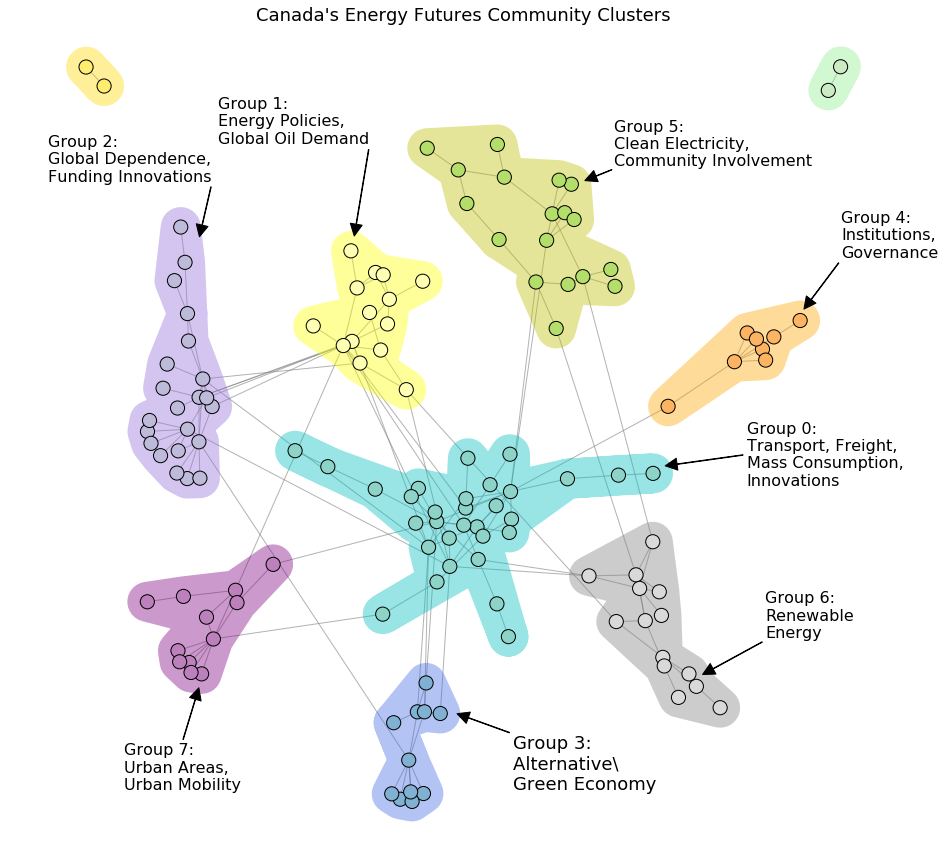

In [31]:
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title("Canada's Energy Futures Community Clusters", fontsize= 18)
nx.draw_networkx_nodes(GSE4, layout2, node_size=200, node_color=colors, cmap = my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout2, edge_color='grey',width=1, alpha=0.6)

plt.gca().add_patch(grp0)
plt.gca().add_patch(grp1)
plt.gca().add_patch(grp2)
plt.gca().add_patch(grp3)
plt.gca().add_patch(grp4)
plt.gca().add_patch(grp5)
plt.gca().add_patch(grp6)
plt.gca().add_patch(grp7)
plt.gca().add_patch(grp8)
plt.gca().add_patch(grp9)

labelanywhere('Group 0:\nTransport, Freight,\nMass Consumption,\nInnovations',(0.53,-0.05),(0.75,-0.1),16)
labelanywhere('Group 1:\nEnergy Policies,\nGlobal Oil Demand',(-0.29,0.55),(-0.65,0.8),16)
labelanywhere('Group 2:\nGlobal Dependence,\nFunding Innovations',(-0.7,0.55),(-1.1,0.7),16)
labelanywhere('Group 3:\nAlternative\ \nGreen Economy',(-0.02,-0.7),(0.13,-0.9),18)
labelanywhere('Group 4:\nInstitutions,\nGovernance',(0.9,0.36),(1,0.5),16)
labelanywhere('Group 5:\nClean Electricity,\nCommunity Involvement',(0.32,0.7),(0.4,0.74),16)
labelanywhere('Group 6:\nRenewable\nEnergy',(0.63,-0.6),(0.8,-0.5),16)
labelanywhere('Group 7:\nUrban Areas,\nUrban Mobility',(-0.7,-0.63),(-0.9,-0.9),16)

plt.savefig('./figures/SNR-ESM-Fig5.png', bbox_inches = 'tight')

## Visualizing Modular Structure of Global Network - Community Detection

In [32]:
partition_world = community.best_partition(GSE_wec, randomize=False)

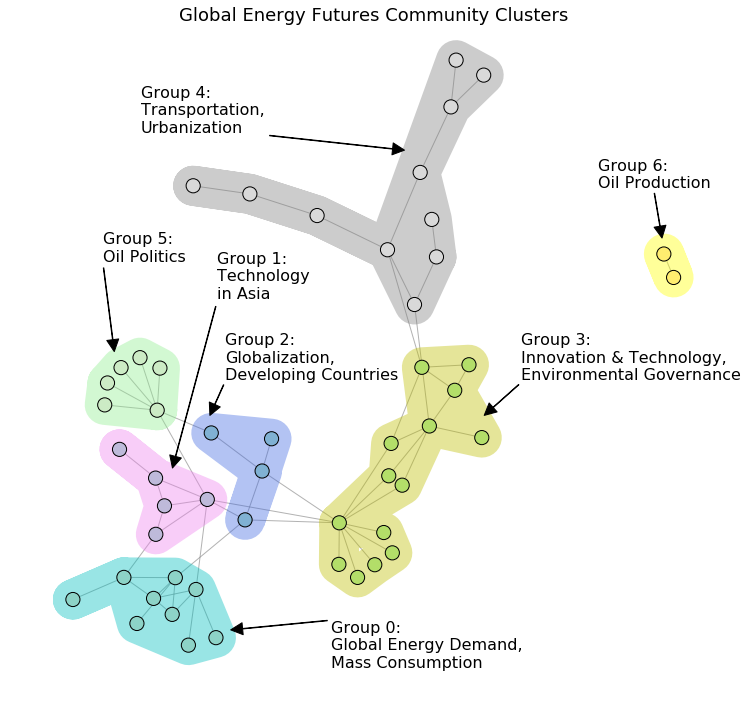

In [33]:
my_fontsize = 12
colors = [partition_world[n] for n in GSE_wec.nodes()]
my_colors = plt.cm.Set3 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html
layout3 = nx.spring_layout(GSE_wec, random_state=26)

# Move group 3 in green
checklist = [n for n in partition_world if partition_world[n]==3]
for n in checklist:
    layout3[n] = layout3[n] + ([0.05,-0.1])

# Create polygon patches for each groups
grp0_lst = ['Energy intensity (global)','Growing middle class (global)',
            'Educational attainment (global)','Economic investment (global)',
            'Energy value chain (global)','Energy demand (global)',
            'Labor force (global)','Growing middle class (global)',
            'Mass consumption (global)','Growing middle class (global)']
grp0_area = lst_to_area(grp0_lst, layout3)
grp0 = Polygon(grp0_area, closed=True, fill=False, ec='c',joinstyle='round',lw=40,alpha=0.4)

grp1_lst = ['Energy production cost (global)','Rate of energy tech change (global)',
            'Tech investment (global)','Rise of China and Asia','GDP (global)',
            'Rate of energy tech change (global)']
grp1_area = lst_to_area(grp1_lst, layout3)
grp1 = Polygon(grp1_area, closed=True, fill=False, ec='violet',joinstyle='round',lw=40,alpha=0.4)

grp2_lst = ['Globalization','Tech dev in ICT (global)',
            'Economic productivity (global)','Developing countries GDP',
            'Globalization']
grp2_area = lst_to_area(grp2_lst, layout3)
grp2 = Polygon(grp2_area, closed=True, fill=False, ec='royalblue',joinstyle='round',lw=40,alpha=0.4)

grp3_lst = ['Innovation capacity (global)','Tech dev in data analytics (global)',
            'Tech dev in articifical intelligence (global)','Tech dev in machine learning (global)',
            'Tech dev in renewable energy (global)','Tech dev in energy storage (global)',
            'Innovation capacity (global)','Tech dev in energy efficiency (global)',
            'Environmental consciousness (global)','Electrification of rail transport (global)',
            'Global environmental institution','GHG reduction target',
            'Carbon intensity (global)','Environmental consciousness (global)',
            'Tech dev in low carbon system (global)','Tech dev in green transport (global)',
            'Innovation capacity (global)']
grp3_area = lst_to_area(grp3_lst, layout3)
grp3 = Polygon(grp3_area, closed=True, fill=False, ec='y',joinstyle='round',lw=40,alpha=0.4)

grp4_lst = ['GHG Emissions (global)','Renewable energy generation (global)',
           'Health risk awareness (global)','Nuclear power generation (global)',
           'Health risk awareness (global)','Renewable energy generation (global)',
           'GHG Emissions (global)','Adoption of EV (global)',
           'Electricity demand (global)','GHG Emissions (global)',
            'Electricity demand (global)','Urbanization (global)',
           'Fuel switching (global)','LNG demand (global)',
           'Gasification of marine feeder transport (global)',
           'Gasification of heavy freight transport (global)']
grp4_area = lst_to_area(grp4_lst, layout3)
grp4 = Polygon(grp4_area, closed=True, fill=False, ec='grey',joinstyle='round',lw=40,alpha=0.4)

grp5_lst = ['Geopolitical tensions','Technology transfer (global)',
            'LNG prices (global)','Geopolitical tensions',
            'LNG prices (global)','Oil prices (global)',
            'Global institutions','Stability of Middle Eastern region']
grp5_area = lst_to_area(grp5_lst, layout3)
grp5 = Polygon(grp5_area, closed=True, fill=False, ec='lightgreen',joinstyle='round',lw=40,alpha=0.4)

grp6_lst = ['Oil production (global)','Oil demand (global)']
grp6_area = lst_to_area(grp6_lst, layout3)
grp6_area.append(grp6_area[0]+[0.001,0.001])
grp6 = Polygon(grp6_area, closed=True, fill=False, ec='yellow',joinstyle='round',lw=40,alpha=0.4)

plt.figure(figsize=(12,12))
plt.title('Global Energy Futures Community Clusters', fontsize= 18)
plt.axis('off')
nx.draw_networkx_nodes(GSE_wec, layout3, node_size=200, node_color=colors, cmap = my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE_wec, layout3, edge_color='grey',width=1, alpha=0.6)

# Plot all the patches
plt.gca().add_patch(grp0)
plt.gca().add_patch(grp1)
plt.gca().add_patch(grp2)
plt.gca().add_patch(grp3)
plt.gca().add_patch(grp4)
plt.gca().add_patch(grp5)
plt.gca().add_patch(grp6)

labelanywhere('Group 0:\nGlobal Energy Demand,\nMass Consumption',(-0.17,-0.6),(0.1,-0.7),16)
labelanywhere('Group 1:\nTechnology\nin Asia',(-0.32,-0.17),(-0.2,0.3),16)
labelanywhere('Group 2:\nGlobalization,\nDeveloping Countries',(-0.22,-0.02),(-0.18,0.08),16)
labelanywhere('Group 3:\nInnovation & Technology,\nEnvironmental Governance',(0.5,-0.02),(0.6,0.08),16)
labelanywhere('Group 4:\nTransportation,\nUrbanization',(0.3,0.7),(-0.4,0.75),16)
labelanywhere('Group 5:\nOil Politics',(-0.47,0.15),(-0.5,0.4),16)
labelanywhere('Group 6:\nOil Production',(0.97,0.46),(0.8,0.6),16)

plt.savefig('./figures/SNR-ESM-Fig6.png', bbox_inches = 'tight')